In [13]:
import numpy as np
import cupy as cp
import matplotlib.pyplot as plt
import scipy.io

In [20]:
training_data = scipy.io.loadmat('sarcos_inv.mat')
training_data = training_data['sarcos_inv']
x_train = training_data[:5000, 0:21]
y_train = training_data[:5000, 21]

test_data = scipy.io.loadmat('sarcos_inv_test.mat')
test_data = test_data['sarcos_inv_test']
x_test = test_data[:500, 0:21]
y_test = test_data[:500, 21]

noise_var = 1e-3

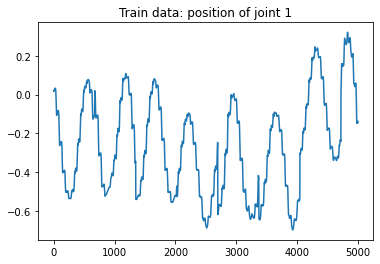

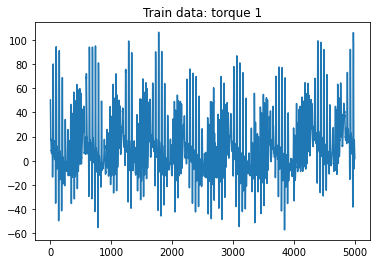

In [27]:
plt.title('Train data: position of joint 1')
plt.plot(x_train[:, 0])
plt.show()

plt.title('Train data: torque 1')
plt.plot(y_train[:])
plt.show()

In [28]:
sigma = 1
l = np.sqrt(2)

def k_se(a, b):
    sqdist = np.sum(a**2, 1).reshape(-1, 1) + np.sum(b**2, 1) - 2 * (a@b.T)
    return sigma*np.exp(-1/(2*l**2)*sqdist)

In [29]:
def get_posterior(k, x, xs, t):
    # Calculate mean
    L = np.linalg.cholesky(k(x, x) + noise_var*np.eye(x.shape[0]))
    a = np.linalg.solve(L.T, np.linalg.solve(L, t))
    mean = k(x, xs).T @ a
    
    # Calculate variance
    v = np.linalg.solve(L, k(x, xs))
    var = k(xs, xs) - v.T @ v
    
    return mean, var

In [30]:
mean, var = get_posterior(k_se, x_train, x_test, y_train)
std = np.sqrt(np.diag(var))

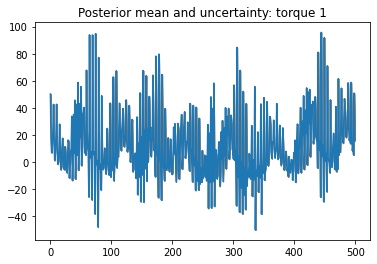

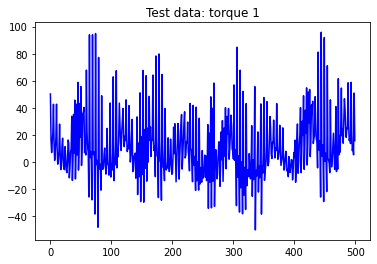

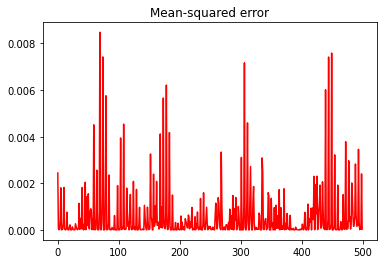

In [31]:
plt.title('Posterior mean and uncertainty: torque 1')
plt.plot(mean)
plt.fill_between (np.linspace(0, mean.shape[0] - 1, mean.shape[0]), mean + 3*np.sqrt(np.diag(var)), mean - 3*np.sqrt(np.diag(var)), color='lightgray')
plt.fill_between (np.linspace(0, mean.shape[0] - 1, mean.shape[0]), mean + 2*np.sqrt(np.diag(var)), mean - 2*np.sqrt(np.diag(var)), color='darkgray')
plt.fill_between (np.linspace(0, mean.shape[0] - 1, mean.shape[0]), mean + 1*np.sqrt(np.diag(var)), mean - 1*np.sqrt(np.diag(var)), color='gray')
plt.show()

plt.title('Test data: torque 1')
plt.plot(y_test, 'b')
plt.show()

plt.title('Mean-squared error')
plt.plot((y_test-mean)**2, 'r')
plt.show()